# Object Detection with YOLO

### Overview
Welcome to this hands-on session on object detection using YOLO (You Only Look Once), a popular and efficient real-time object detection system. In this practical activity, we aim to bridge the gap between theoretical knowledge and real-world application, providing you with a tangible experience in applying object detection techniques within the realm of Applied Artificial Intelligence.

### Objectives:
- Understand the fundamental components and functioning of the YOLO object detection model.
- Learn how to set up your environment to work with YOLO using Python.
- Gain hands-on experience in running object detection on images.
- Interpret the model's output to identify and locate objects within an image.
- Visualize the results and draw insights on how different parameters and settings can affect the performance.

By the end of this session, you should be able to confidently run object detection on images using YOLO, interpret the results, and understand the potential applications of these techniques in various domains.

## Import libararies

We will start by preparing our Python environment by installing the necessary libraries required for this practical activity. Mainly, we will be using OpenCV to handle image processing and visualization, NumPy for numerical operations, and Matplotlib for plotting and visualizing our results.

In [2]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time
import cv2
# import zipfile
from collections import namedtuple
import time
import os
from google.colab.patches import cv2_imshow


### Download images

Below we use the wget command-line utility to download three images from Dropbox and save them with specific filenames on the environment where the code is being executed.

In [5]:
!wget "https://www.dropbox.com/scl/fi/obxf4fhd4hp1efpijhszd/baggage_claim.jpg?rlkey=i9eledwgb4lf3yxt67pg34k1n&dl=1" -O baggage_claim.jpg
!wget "https://www.dropbox.com/scl/fi/rg0dvdts1dwz5hzi38wf5/traffic.jpeg?rlkey=pxps6hcevynoxp7sdoxz0apz1&dl=1" -O traffic.jpeg
!wget "https://www.dropbox.com/scl/fi/rxrf4jlk00axad2k13q0h/2012_000160.jpg?rlkey=v8h1en728eqaoxjtgxuctvid6&dl=1" -O 2012_000160.jpg



--2025-03-02 18:25:28--  https://www.dropbox.com/scl/fi/obxf4fhd4hp1efpijhszd/baggage_claim.jpg?rlkey=i9eledwgb4lf3yxt67pg34k1n&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc949981498ebf4ea37f383683b3.dl.dropboxusercontent.com/cd/0/inline/ClE6cn64fdZMtQtXe4OMkmhzvNG-6y-7yPjXpiTiUSB3BNA4bmTypya4QvOOV5-c9jAe8iu4hxCB99MDJXcpU5MV00ovYS7gbNEhANQsDJgvOqiJX9kUfzTnwxpt8NBsfDA/file?dl=1# [following]
--2025-03-02 18:25:28--  https://uc949981498ebf4ea37f383683b3.dl.dropboxusercontent.com/cd/0/inline/ClE6cn64fdZMtQtXe4OMkmhzvNG-6y-7yPjXpiTiUSB3BNA4bmTypya4QvOOV5-c9jAe8iu4hxCB99MDJXcpU5MV00ovYS7gbNEhANQsDJgvOqiJX9kUfzTnwxpt8NBsfDA/file?dl=1
Resolving uc949981498ebf4ea37f383683b3.dl.dropboxusercontent.com (uc949981498ebf4ea37f383683b3.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
C

### Download YOLO model

Next, we use the same command to download the YOLO model as a zip file, and extract its contents.

In [7]:
!wget "https://www.dropbox.com/scl/fi/s54o1zr6qgu5il4kcqrz9/yolo-coco-model.zip?rlkey=qln85puh8gfpcrrqtpq1ygqoz&dl=1" -O yolo-object-model.zip


--2025-03-02 18:26:29--  https://www.dropbox.com/scl/fi/s54o1zr6qgu5il4kcqrz9/yolo-coco-model.zip?rlkey=qln85puh8gfpcrrqtpq1ygqoz&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfa732958cf246540968d588ff7.dl.dropboxusercontent.com/cd/0/inline/ClFic6Y9GNJWk_uqe3aevpqQMSrcFXXgc5zPmNsuNDLS_IM9UiJR0ZdeqUR0Zf6NkqiSZZYEzqE9zKQfQKAnE3n5uygyynEhMF2n2eeXkJB2fgnkwcAnfwwTt4-yVRywX8Q/file?dl=1# [following]
--2025-03-02 18:26:30--  https://ucfa732958cf246540968d588ff7.dl.dropboxusercontent.com/cd/0/inline/ClFic6Y9GNJWk_uqe3aevpqQMSrcFXXgc5zPmNsuNDLS_IM9UiJR0ZdeqUR0Zf6NkqiSZZYEzqE9zKQfQKAnE3n5uygyynEhMF2n2eeXkJB2fgnkwcAnfwwTt4-yVRywX8Q/file?dl=1
Resolving ucfa732958cf246540968d588ff7.dl.dropboxusercontent.com (ucfa732958cf246540968d588ff7.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f

### Extract model

In [8]:
!unzip -o '/content/yolo-object-model.zip'

Archive:  /content/yolo-object-model.zip
   creating: yolo-coco-model/
  inflating: yolo-coco-model/yolov3.weights  
  inflating: yolo-coco-model/coco.names  
  inflating: yolo-coco-model/yolov3.cfg  


### Overview of the Contents of the Zip File
YOLO models are pre-trained on a large dataset of images and are capable of detecting objects from various categories. For this activity, we will use a pre-trained YOLOv3 model, but the process is similar for other versions of YOLO.

There are several versions of YOLO, including YOLOv1, YOLOv2, YOLOv3, and others. Each version has its own architecture and performance characteristics. For this activity, we will use YOLOv3 due to its balance between speed and accuracy.

- YOLO model weights are the parameters learned during the training process.
- The configuration file contains the settings and architecture of the YOLO model.
- The label names file contains the list of object categories that the YOLO model can detect.

## IoU

In this lab, we will use the Intersection Over Union (IOU) to evaluate the performance of the YOLO model.

IOU is a metric used to evaluate the accuracy of an object detector on a particular dataset. Specifically, it measures the overlap between the ground truth bounding box (i.e., the hand-labeled box around an object) and the predicted bounding box from the model. The IoU is calculated by dividing the area of the intersection of the two boxes by the area of their union.

This metric is crucial in object detection tasks as it provides a clear and straightforward way to quantify the performance of the model, especially how well it is able to precisely locate objects within an image. An IoU score close to 1 indicates a very good match between the predicted and ground truth boxes, while a score close to 0 indicates poor alignment.

In [14]:
def IoU(box1, box2):
    """
    Computes the Intersection over Union (IoU) between two bounding boxes.

    Parameters:
        box1: [x1, y1, x2, y2] coordinates of the ground truth box
        box2: [x1, y1, x2, y2] coordinates of the predicted box

    Returns:
        IoU score (float) between 0 and 1. If no intersection, returns 0.
    """
    # Determine coordinates of the intersection rectangle
    left_x = max(box1[0], box2[0])
    top_y = max(box1[1], box2[1])
    right_x = min(box1[2], box2[2])
    bottom_y = min(box1[3], box2[3])

    # Compute intersection area (ensure non-negative)
    inter_width = max(0, right_x - left_x)
    inter_height = max(0, bottom_y - top_y)
    inter_area = inter_width * inter_height

    # Compute individual box areas (ensure positive dimensions)
    box1_area = max(0, (box1[2] - box1[0]) * (box1[3] - box1[1]))
    box2_area = max(0, (box2[2] - box2[0]) * (box2[3] - box2[1]))

    # Compute IoU (avoid division by zero)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0.0



## Let's Use YOLO For Object Detection

When working with YOLO, we need to set two important parameters to control the behavior of the model and adjust its performance according to the specific requirements of the task at hand. These include:

#### CONFIDENCE
- Description: The confidence parameter is a threshold that determines the minimum confidence level the model must have for its prediction to be considered valid.
- Role: When the YOLO model predicts bounding boxes for objects in the image, it also assigns a confidence score to each prediction, indicating how certain it is that the prediction is correct. By setting a confidence threshold, you filter out predictions with a confidence score below this threshold, reducing the number of false positives (i.e., incorrect detections). A common value for confidence is 0.5, meaning the model must be at least 50% sure of its prediction for it to be considered.

#### THRESHOLD
- Description: The threshold parameter is used during Non-Maximum Suppression (NMS), a post-processing step to refine the object detection results.
- Role: YOLO might detect multiple bounding boxes around the same object with varying confidence scores. NMS looks at these overlapping boxes and keeps only the box with the highest confidence, discarding the rest. The threshold parameter defines how much overlap is allowed between bounding boxes; if the IoU (Intersection over Union) of two boxes is higher than this threshold, the box with the lower confidence score is discarded. Setting a lower value will result in fewer boxes being kept, potentially reducing false positives but also possibly missing valid objects that are close together.


By adjusting the CONFIDENCE and THRESHOLD values, you can balance the trade-off between precision and recall, and tune the model to perform optimally for your specific use case. Precision refers to the accuracy of the predictions made, while recall refers to the model’s ability to detect all possible valid objects.



In [17]:
PATH_TO_IMAGE = '/content/baggage_claim.jpg'
PATH_TO_YOLO = '/content/yolo-coco-model'
CONFIDENCE = 0.5
THRESHOLD = 0.3

Below we defin the YOLO class which serves as a comprehensive utility for performing object detection on images using the YOLOv3 model. The class is designed to handle various steps involved in object detection, from loading the model, performing forward passes, to drawing bounding boxes around detected objects.

Its main functions include:

#### init(self, PATH_TO_YOLO, CONFIDENCE, THRESHOLD):

- Initializes the YOLO object detector.
Loads the class labels that the YOLO model can detect.
Initializes colors for bounding boxes.
Loads the YOLO model using the provided weights and configuration files.
Determines the output layer names needed from YOLO.

#### forward(self, image):

- Accepts an image as input and performs a forward pass through the YOLO network.
Filters out weak detections based on the confidence threshold.
Populates lists with bounding box coordinates, confidences, and class IDs of detected objects.

#### non_max_suppression(self):

- Applies Non-Maximum Suppression (NMS) to filter out overlapping bounding boxes, keeping only the ones with the highest confidence scores.
Ensures that a single object is not detected multiple times.

#### detect(self, image):

- Integrates the forward pass and NMS.
Draws bounding boxes around detected objects on the image along with their class labels and confidence scores.
Returns the image with the drawn bounding boxes.

By encapsulating the functionality within a class, the code promotes readability and ease of use, allowing for straightforward object detection on any input image. The class can be instantiated with the path to the YOLO model, as well as confidence and threshold values, providing a tailored object detection experience according to the user's requirements.

In [18]:
class YOLO:
  def __init__(self, PATH_TO_YOLO, CONFIDENCE, THRESHOLD):
    self.CONFIDENCE = CONFIDENCE
    self.THRESHOLD = THRESHOLD
    # load the COCO class labels our YOLO model was trained on
    labelsPath = os.path.sep.join([PATH_TO_YOLO, 'coco.names'])
    self.LABELS = open(labelsPath).read().strip().split("\n")

    # initialize a list of colors to represent each possible class label
    np.random.seed(42)
    self.COLORS = np.random.randint(0, 255, size=(len(self.LABELS), 3),	dtype="uint8")

    # derive the paths to the YOLO weights and model configuration
    weightsPath = os.path.sep.join([PATH_TO_YOLO, "yolov3.weights"])
    print(weightsPath)
    configPath = os.path.sep.join([PATH_TO_YOLO, "yolov3.cfg"])

    # load YOLO object detector trained on COCO dataset (80 classes)
    net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

    # determine only the *output* layer names that we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    self.net = net
    self.ln = ln

  def forward(self, image):
    """
    feed an image to YOLO network, filter weak boxes,
    return boxes, confidence, class labels
    """
    (H, W) = image.shape[:2]
    # construct a blob from the input image and then perform a forward
    # pass of the YOLO object detector, giving us our bounding boxes and
    # associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    self.net.setInput(blob)
    start = time.time()
    layerOutputs = self.net.forward(self.ln)
    end = time.time()

    print("[INFO] YOLO took {:.6f} seconds".format(end - start))

    # initialize our lists of detected bounding boxes, confidences, and
    # class IDs, respectively
    boxes = []
    confidences = []
    classIDs = []

    # loop over each of the layer outputs
    for output in layerOutputs:
      # loop over each of the detections
      for detection in output:
        # extract the class ID and confidence
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        # filter out weak predictions
        if confidence > self.CONFIDENCE:
          # scale the bounding box coordinates back relative to the
          # size of the image, keeping in mind that YOLO actually
          # returns the center (x, y)-coordinates of the bounding
          # box followed by the boxes' width and height
          box = detection[0:4] * np.array([W, H, W, H])
          (centerX, centerY, width, height) = box.astype("int")

          # use the center (x, y)-coordinates to derive the top and
          # and left corner of the bounding box
          x = int(centerX - (width / 2))
          y = int(centerY + (height / 2))

          # update our list of bounding box coordinates, confidences,
          # and class IDs
          boxes.append([x, y, int(width), int(height)])
          confidences.append(float(confidence))
          classIDs.append(classID)

    self.boxes = np.array(boxes)
    self.confidences = np.array(confidences)
    self.classIDs = np.array(classIDs)

  def non_max_supression(self):
    """
    perform non-maximum supression over boxes
    """
    # can be done using cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)
    idxs = np.argsort(-self.confidences)
    confidences = self.confidences[idxs]
    boxes = self.boxes[idxs]
    classIDs = self.classIDs[idxs]

    for i in range(len(boxes)):
      x,y,w,h = boxes[i][0],  boxes[i][1], boxes[i][2], boxes[i][3]
      box1 = [x, y, x+w, y+h]
      for j in range(i+1, len(boxes)):
        if classIDs[i] == classIDs[j]:
          # если у них одинаковые классы, вычисляем IoU между ними
          x,y,w,h = boxes[j][0], boxes[j][1], boxes[j][2], boxes[j][3]
          box2 = [x, y, x+w, y+h]
          if IoU(box1, box2)>self.THRESHOLD:
            confidences[j] = 0

    idxs = np.where(confidences>0)
    self.boxes = boxes[idxs]
    self.confidences = confidences[idxs]
    self.classIDs = classIDs[idxs]

  def detect(self, image):
    """
    detect objects, supress non maximums, draw boxes
    return image with boxes
    """
    self.forward(image)
    self.non_max_supression()

    # draw boxes
    for i in range(len(self.boxes)):
      # extract the bounding box coordinates
      (x, y) = (self.boxes[i][0], self.boxes[i][1])
      (w, h) = (self.boxes[i][2], self.boxes[i][3])

      # draw a bounding box rectangle and label on the image
      color = [int(c) for c in self.COLORS[self.classIDs[i]]]
      cv2.rectangle(image, (x, y), (x + w, y - h), color, 2)
      text = "{}: {:.4f}".format(yolo.LABELS[self.classIDs[i]], self.confidences[i])
      cv2.putText(image, text, (x, y - h - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image


The code snippet below demonstrates the process of utilizing the previously defined YOLO class to perform object detection on a specified image.

/content/yolo-coco-model/yolov3.weights
[INFO] YOLO took 3.516993 seconds


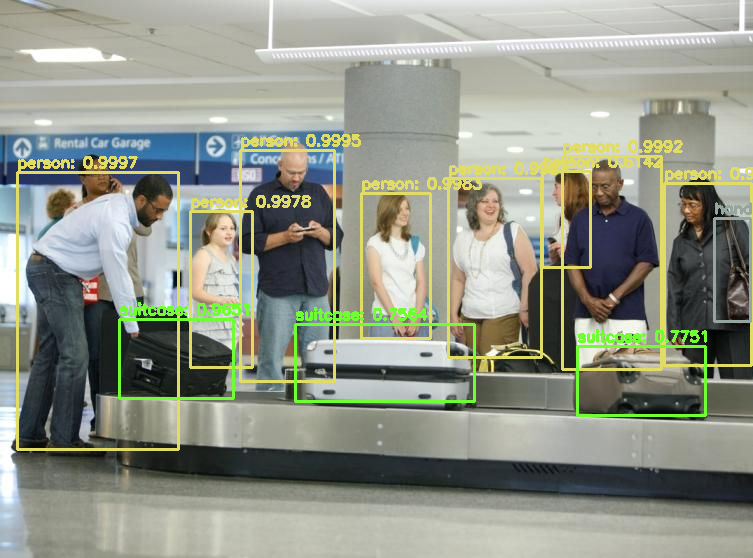

In [19]:
yolo = YOLO(PATH_TO_YOLO, CONFIDENCE, THRESHOLD)
# load our input image and grab its spatial dimensions
image = cv2.imread(PATH_TO_IMAGE)
image = yolo.detect(image)
cv2_imshow(image)

[INFO] YOLO took 1.011742 seconds


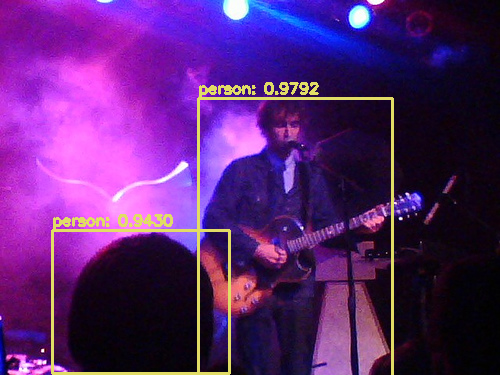

In [20]:
image = cv2.imread('2012_000160.jpg')
image = yolo.detect(image)
cv2_imshow(image)

[INFO] YOLO took 0.989855 seconds


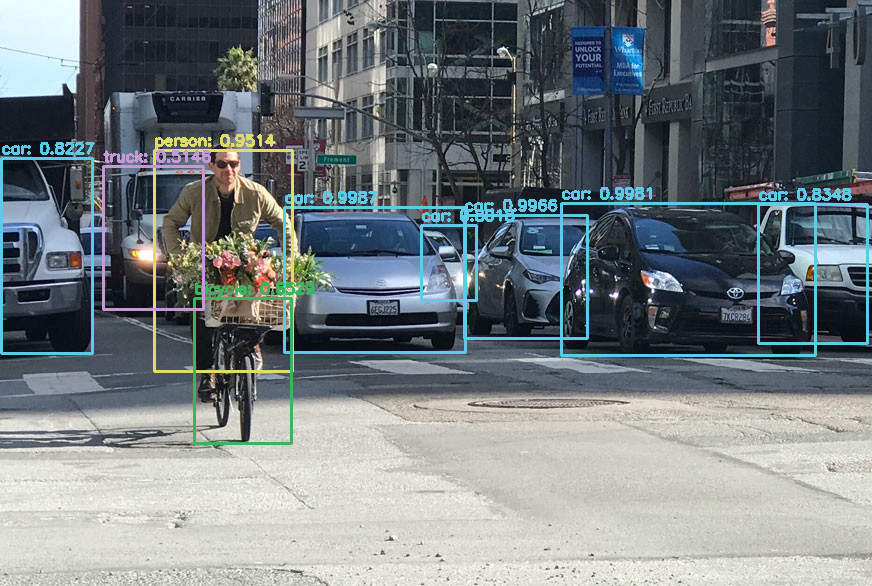

In [21]:
image = cv2.imread('traffic.jpeg')
image = yolo.detect(image)
cv2_imshow(image)

## Task: Exploring the Impact of Confidence and Threshold on YOLO Object Detection

### Objective:
The aim of this task is for you to understand the role of confidence and threshold values in YOLO object detection, and to observe how tuning these parameters can affect the performance of the model.

### Instructions:
1. Choose a diverse set of images for this task. Make sure to include images with clear objects, images with occluded objects, and images with objects of various sizes.

2. Load each image using OpenCV and display the original image using cv2_imshow.

3. For each image, experiment by adjusting the CONFIDENCE and THRESHOLD values. Start with the following ranges and feel free to explore further if needed:
- CONFIDENCE: 0.1, 0.3, 0.5, 0.7, 0.9
- THRESHOLD: 0.1, 0.3, 0.5, 0.7, 0.9

4. For each combination of CONFIDENCE and THRESHOLD, create an instance of the YOLO class, perform object detection, and display the resulting image.
Document Your Findings:

5. Write a short note (~300 words) discussing your observations and findings. Address the following points:
- How do changes in the confidence level affect the number and accuracy of the detected objects?
- How does modifying the threshold value influence the outcome, especially in terms of overlapping bounding boxes?
- Were there specific types of images where the model performed exceptionally well or poorly? If so, provide examples and possible reasons.
- How might these parameters be optimally set for different use cases, and what trade-offs might be involved?

## References

Original YOLO paper [link](https://arxiv.org/pdf/1506.02640.pdf)

YOLOv2 paper [link](https://arxiv.org/pdf/1612.08242v1.pdf)

YOLO explained [link](https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088)

IoU [link](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/)

Non-Maximum Supression [link](https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/)

Overview of deep learning based object detection approaches [link](https://towardsdatascience.com/beginners-guide-to-object-detection-algorithms-6620fb31c375)

Mean Average Precision [link](https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173)

